# Red Wine Quality Prediction Project

# Project Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

# Attribute Information

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 

# Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

# Dataset Link

https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Red%20Wine/winequality-red.csv

In [1]:
#Import the library for Red wine quality prediction project- Classification problem
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,auc,roc_curve,RocCurveDisplay
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV,cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

In [2]:
#Read the dataset from the local storage in the pandas DataFrame

winedf=pd.read_csv(r"/kaggle/input/red-wine-quality/winequality-red - Copy.csv")
winedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
winedf.isnull().sum()   # There is no null/None in the dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
winedf.shape  # Dataset with 1599 rows and 12 columns

(1599, 12)

In [6]:
winedf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
winedf.duplicated().sum()

240

In [8]:
winedf.drop_duplicates(inplace=True)

In [9]:
winedf.nunique().to_frame("No of Unique records")

,No of Unique records
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


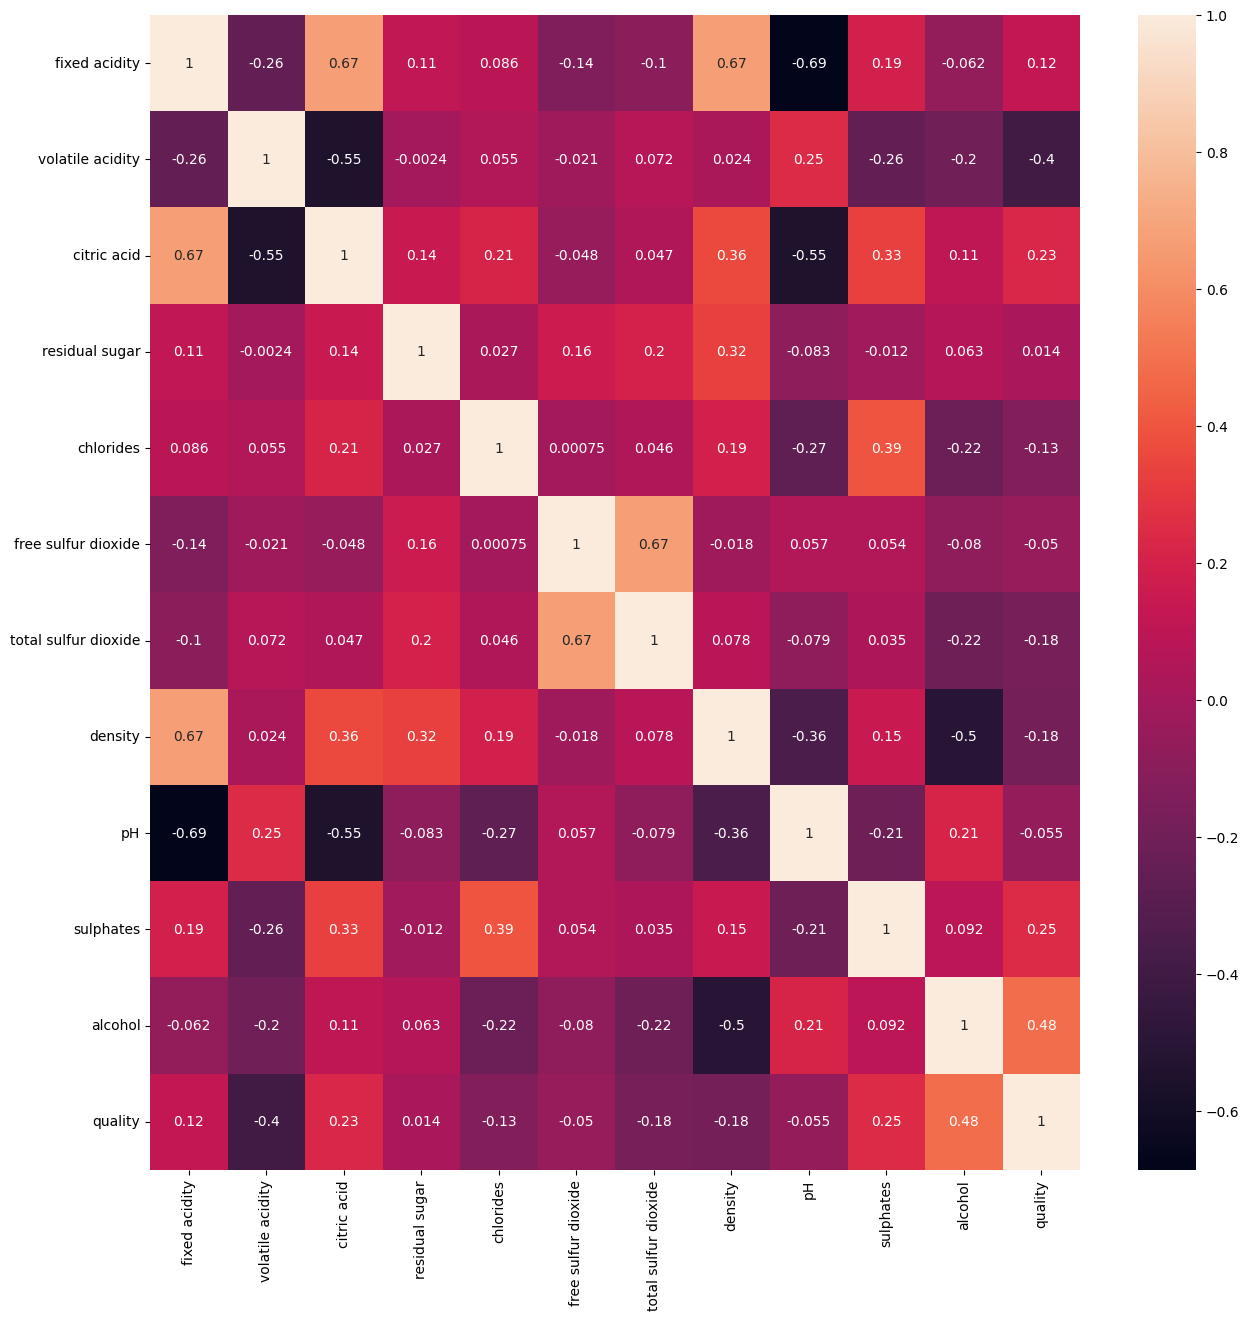

In [10]:
#to check for the correlation in the dataset using seaborn heatmap
plt.figure(figsize=(15,15))
sns.heatmap(winedf.corr(),annot=True)
plt.show()

In [11]:
#check dataset for the skewness  #Range should from -0.5 to 0.5
winedf.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          4.548153
chlorides               5.502487
free sulfur dioxide     1.226579
total sulfur dioxide    1.540368
density                 0.044778
pH                      0.232032
sulphates               2.406505
alcohol                 0.859841
quality                 0.192407
dtype: float64

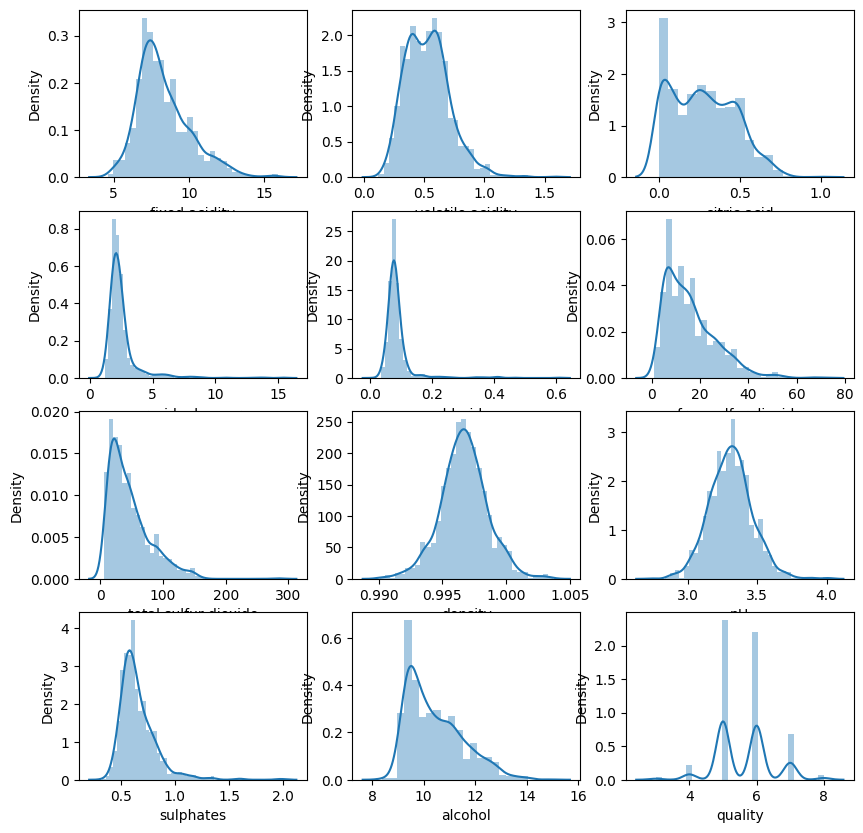

In [12]:
plt.figure(figsize=(10,10))
p=1
for i in winedf:
    if p<=12:
        plt.subplot(4,3,p)
        sns.distplot(winedf[i])
        plt.xlabel(i)
        
    p=p+1
plt.show() 

In [13]:
#remove skewness in the dataset using cuberoot

#Method1
winedf["chlorides"]=np.cbrt(winedf["chlorides"])
winedf["residual sugar"]=np.cbrt(winedf["residual sugar"])
winedf["free sulfur dioxide"]=np.cbrt(winedf["free sulfur dioxide"])
winedf["total sulfur dioxide"]=np.cbrt(winedf["total sulfur dioxide"])
winedf["sulphates"]=np.cbrt(winedf["sulphates"])

In [14]:
#remove skewness in the dataset method2
#winedf["chlorides"]=np.log(winedf["chlorides"])

In [15]:
#Method3
from scipy.stats import boxcox

winedf["chlorides"]=boxcox(winedf["chlorides"],0)
winedf["residual sugar"]=boxcox(winedf["residual sugar"],0)  # 0 is used for Log Transformation
winedf["free sulfur dioxide"]=boxcox(winedf["free sulfur dioxide"],0)
winedf["total sulfur dioxide"]=boxcox(winedf["total sulfur dioxide"],0)
winedf["sulphates"]=boxcox(winedf["sulphates"],0)

In [16]:
winedf.skew()

fixed acidity           0.941041
volatile acidity        0.729279
citric acid             0.312726
residual sugar          1.765238
chlorides               1.887642
free sulfur dioxide    -0.220069
total sulfur dioxide   -0.078161
density                 0.044778
pH                      0.232032
sulphates               0.961460
alcohol                 0.859841
quality                 0.192407
dtype: float64

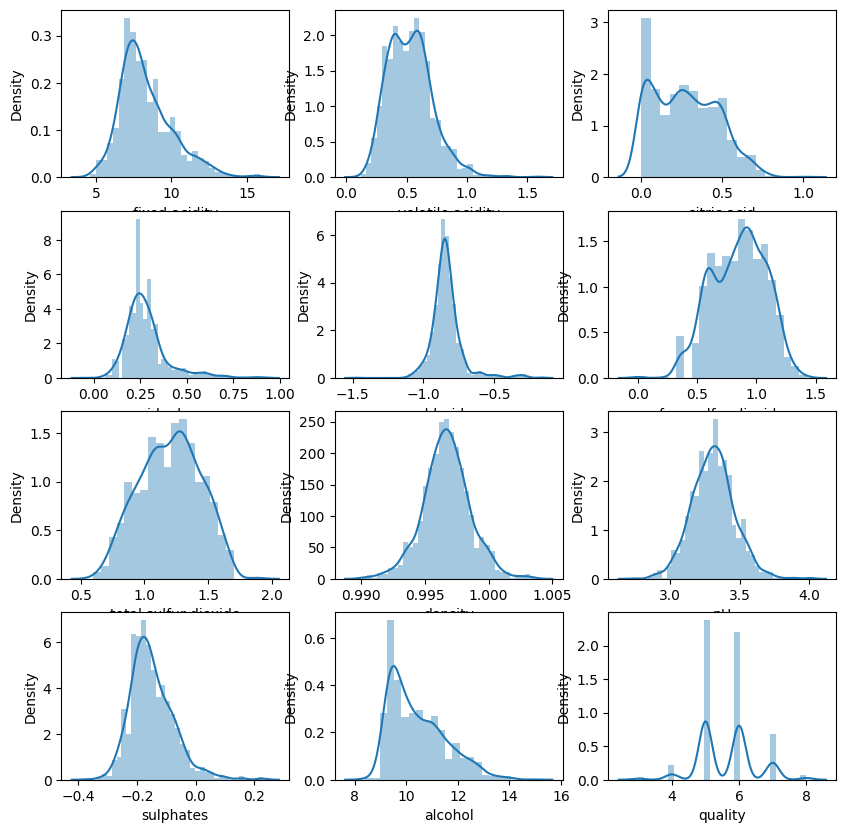

In [17]:
plt.figure(figsize=(10,10))
p=1
for i in winedf:
    if p<=12:
        plt.subplot(4,3,p)
        sns.distplot(winedf[i])
        plt.xlabel(i)
        
    p=p+1
plt.show() 

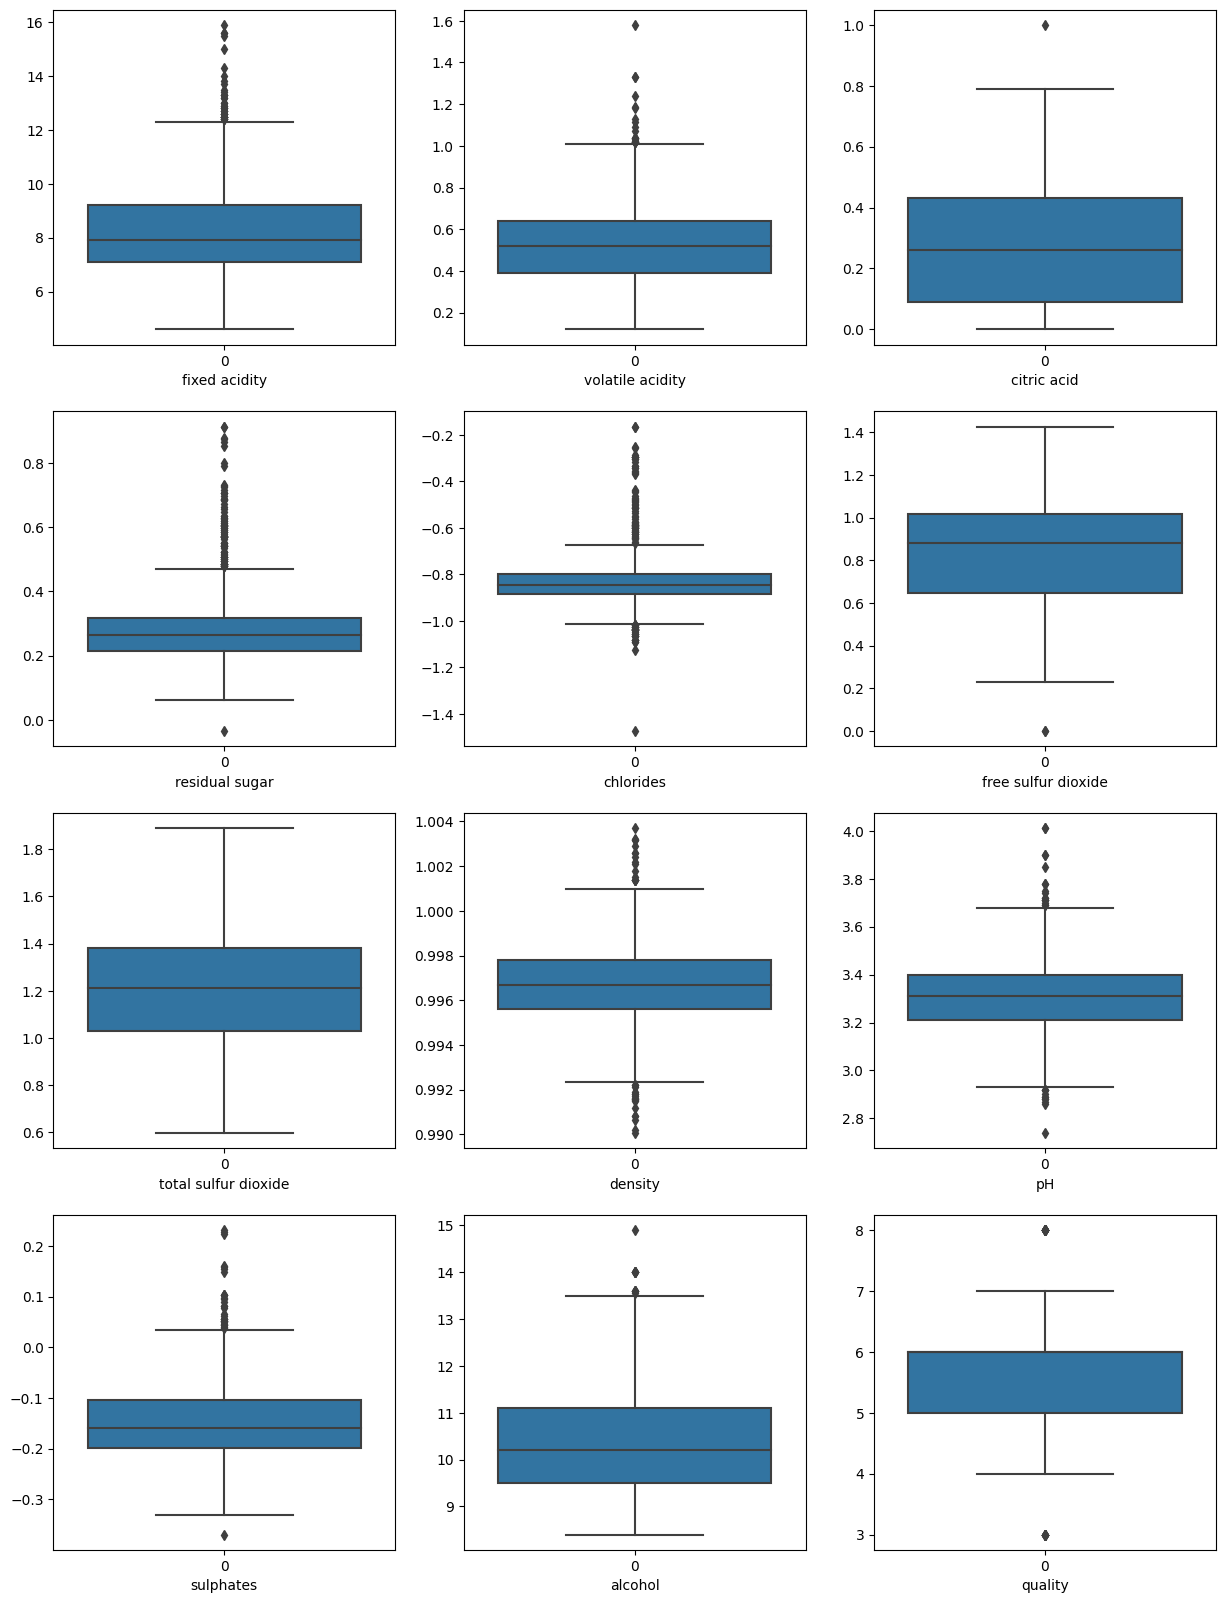

In [18]:
#check for the outliers in the datset using boxplot

plt.figure(figsize=(15,20))
p=1
for i in winedf:
    if p<=12:
        plt.subplot(4,3,p)
        sns.boxplot(winedf[i])
        plt.xlabel(i)
    p=p+1
plt.show()

In [19]:
#remove the outliers in the dataset using scipy.zscore
z=np.abs(zscore(winedf))    # get the zscore
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.524431,0.932000,1.393258,0.589987,0.220794,0.219376,0.109890,0.584003,1.291872,0.603155,0.954374,0.757040
1,0.294063,1.915800,1.393258,0.306497,0.536033,0.981507,0.843794,0.048737,0.708395,0.263163,0.584575,0.757040
2,0.294063,1.259934,1.188617,0.043920,0.347956,0.234301,0.540524,0.155790,0.321247,0.061837,0.584575,0.757040
3,1.664067,1.363534,1.471711,0.589987,0.260223,0.417382,0.688653,0.691057,0.966495,0.446579,0.584575,0.457621
5,0.524431,0.713378,1.393258,0.744519,0.260223,0.024981,0.118600,0.584003,1.291872,0.603155,0.954374,0.757040
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,0.869983,0.494756,0.983977,0.589987,0.551900,1.147278,0.046485,0.106490,0.711149,1.098495,0.861924,0.457621
1594,1.215536,0.385444,0.983977,0.443382,0.282527,1.342600,0.252599,0.968269,0.904724,0.446579,0.062574,0.757040
1595,1.388312,0.112167,0.881656,0.170970,0.826885,1.631968,0.460164,0.850510,1.356397,0.759448,0.709723,0.457621
1597,1.388312,0.631395,0.779336,0.443382,0.260223,1.342600,0.252599,0.663167,1.679021,0.455796,0.214775,0.757040


In [20]:
np.where(z>3)

(array([  11,   15,   15,   17,   30,   35,   38,   41,   75,   75,   77,
          80,   85,   87,   96,   96,  114,  115,  127,  131,  135,  135,
         135,  135,  144,  145,  150,  150,  159,  176,  202,  202,  211,
         214,  226,  226,  241,  245,  252,  282,  295,  302,  328,  334,
         346,  361,  385,  385,  393,  400,  408,  420,  420,  433,  450,
         462,  473,  483,  483,  485,  485,  491,  492,  510,  516,  528,
         534,  555,  562,  565,  565,  565,  582,  597,  597,  599,  602,
         626,  627,  632,  652,  668,  671,  672,  710,  718,  722,  722,
         764,  771,  781,  786,  866,  888,  895,  895,  912,  918,  920,
         945,  948,  994, 1013, 1052, 1060, 1073, 1081, 1081, 1082, 1082,
        1106, 1106, 1107, 1117, 1121, 1123, 1123, 1125, 1162, 1165, 1165,
        1216, 1216, 1245, 1250, 1250, 1253, 1276, 1325, 1325, 1332, 1336,
        1350]),
 array([ 9,  4,  9,  4,  3,  1,  4,  8,  4,  9,  4,  9,  9,  8,  4,  9,  1,
         1, 10,  4, 

In [21]:
#select only the columns with z<3
wine=winedf[(z<3).all(axis=1)]
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.213951,-0.859007,0.799298,1.175454,0.99780,3.51,-0.193273,9.4,5
1,7.8,0.880,0.00,0.318504,-0.774263,1.072959,1.401564,0.99680,3.20,-0.128554,9.8,5
2,7.8,0.760,0.04,0.277636,-0.795322,0.902683,1.329661,0.99700,3.26,-0.143594,9.8,5
3,11.2,0.280,0.56,0.213951,-0.863422,0.944404,1.364782,0.99800,3.16,-0.181576,9.8,6
5,7.4,0.660,0.00,0.195929,-0.863422,0.854983,1.229626,0.99780,3.51,-0.193273,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,0.213951,-0.896083,1.110735,1.212529,0.99651,3.42,-0.066150,9.5,6
1594,6.2,0.600,0.08,0.231049,-0.802649,1.155245,1.261397,0.99490,3.45,-0.181576,10.5,5
1595,5.9,0.550,0.10,0.262819,-0.926874,1.221187,1.310609,0.99512,3.52,-0.091479,11.2,6
1597,5.9,0.645,0.12,0.231049,-0.863422,1.155245,1.261397,0.99547,3.57,-0.114163,10.2,5


In [22]:
wine.shape

(1252, 12)

In [23]:
print("Data Loss Percentage",((winedf.shape[0]-wine.shape[0])/winedf.shape[0])*100)   #Note data loss upto 10% is acceptale after removing outliers in the dataset

Data Loss Percentage 7.873436350257543


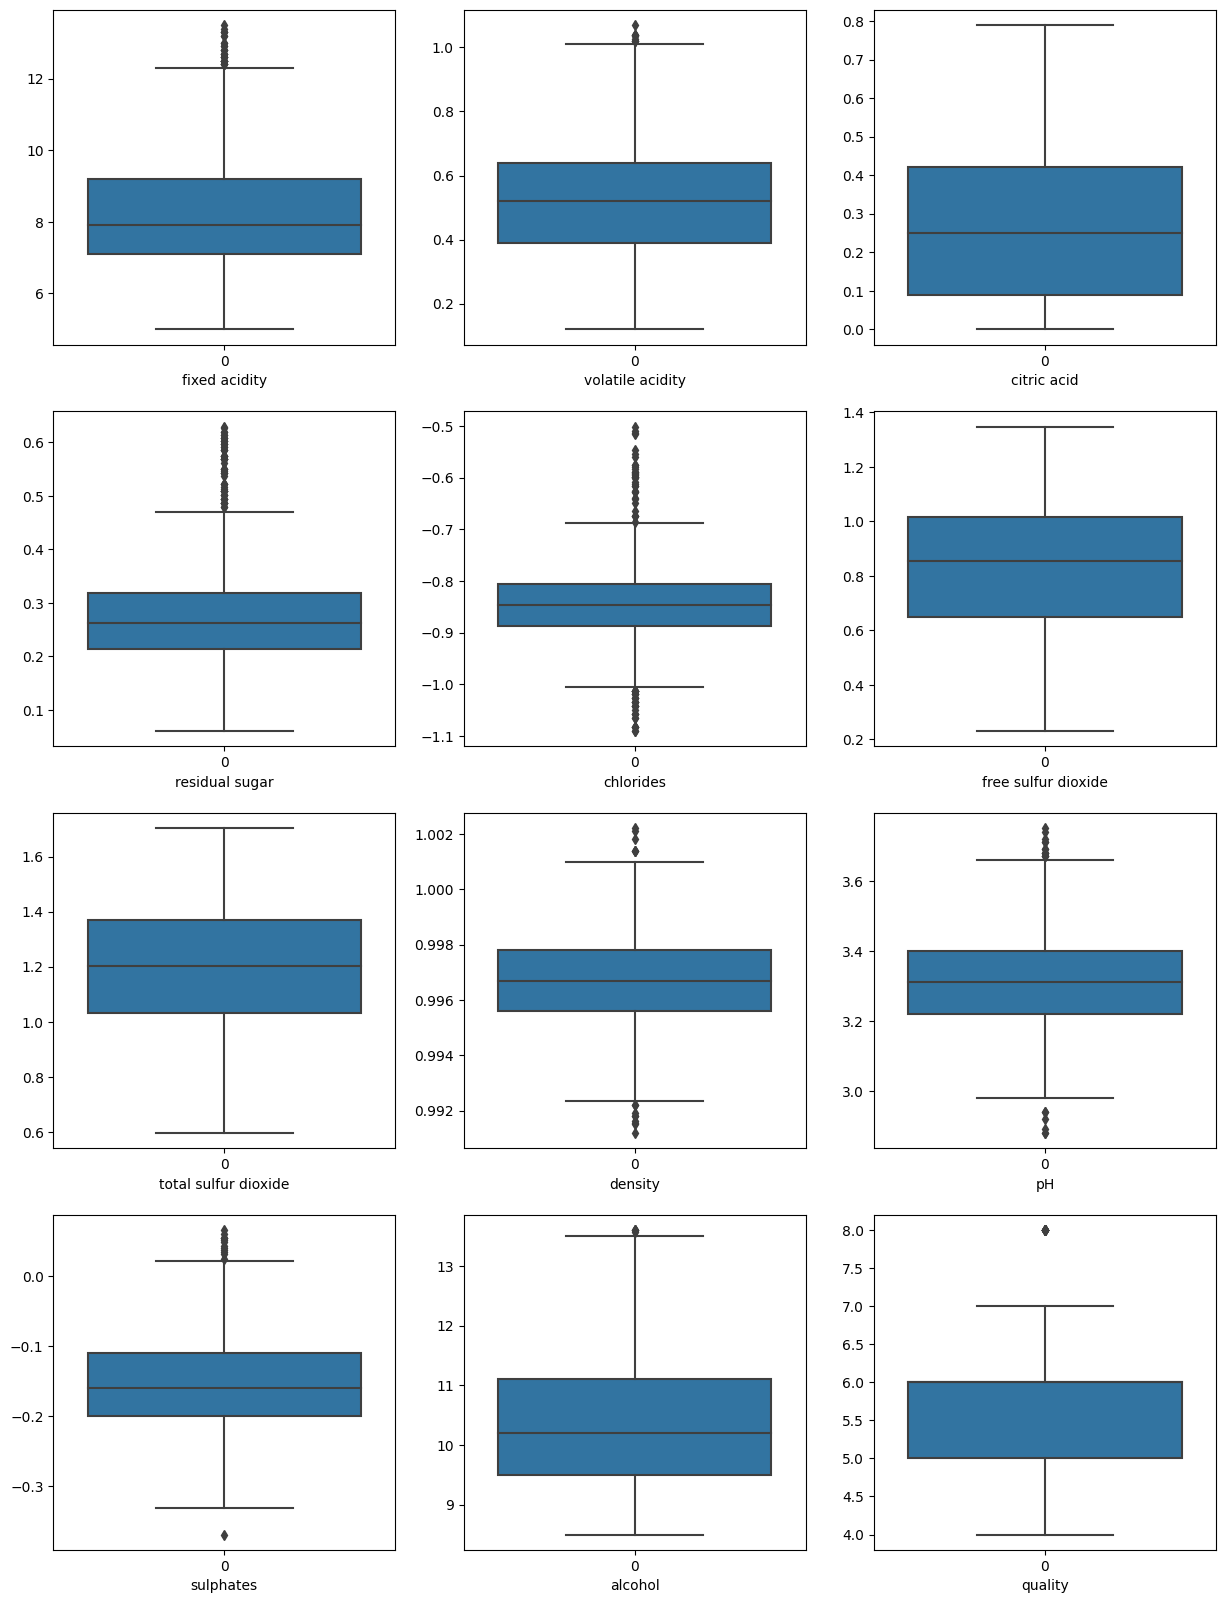

In [24]:
#check for the outliers in the datset using boxplot

plt.figure(figsize=(15,20))
p=1
for i in wine:
    if p<=12:
        plt.subplot(4,3,p)
        sns.boxplot(wine[i])
        plt.xlabel(i)
    p=p+1
plt.show()

In [25]:
wine_quality=[]

for i in wine["quality"]:
    if i>=7:
        wine_quality.append(1)
    else:
        wine_quality.append(0)

wine["quality"]=wine_quality

In [26]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.213951,-0.859007,0.799298,1.175454,0.9978,3.51,-0.193273,9.4,0
1,7.8,0.88,0.00,0.318504,-0.774263,1.072959,1.401564,0.9968,3.20,-0.128554,9.8,0
2,7.8,0.76,0.04,0.277636,-0.795322,0.902683,1.329661,0.9970,3.26,-0.143594,9.8,0
3,11.2,0.28,0.56,0.213951,-0.863422,0.944404,1.364782,0.9980,3.16,-0.181576,9.8,0
5,7.4,0.66,0.00,0.195929,-0.863422,0.854983,1.229626,0.9978,3.51,-0.193273,9.4,0


In [27]:
#split x (input) and y(target/label)

x=wine.drop(columns="quality",axis=1)
x.reset_index(drop=True,inplace=True)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.213951,-0.859007,0.799298,1.175454,0.99780,3.51,-0.193273,9.4
1,7.8,0.880,0.00,0.318504,-0.774263,1.072959,1.401564,0.99680,3.20,-0.128554,9.8
2,7.8,0.760,0.04,0.277636,-0.795322,0.902683,1.329661,0.99700,3.26,-0.143594,9.8
3,11.2,0.280,0.56,0.213951,-0.863422,0.944404,1.364782,0.99800,3.16,-0.181576,9.8
4,7.4,0.660,0.00,0.195929,-0.863422,0.854983,1.229626,0.99780,3.51,-0.193273,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1247,6.8,0.620,0.08,0.213951,-0.896083,1.110735,1.212529,0.99651,3.42,-0.066150,9.5
1248,6.2,0.600,0.08,0.231049,-0.802649,1.155245,1.261397,0.99490,3.45,-0.181576,10.5
1249,5.9,0.550,0.10,0.262819,-0.926874,1.221187,1.310609,0.99512,3.52,-0.091479,11.2
1250,5.9,0.645,0.12,0.231049,-0.863422,1.155245,1.261397,0.99547,3.57,-0.114163,10.2


In [28]:
y=wine["quality"]
y.reset_index(drop=True,inplace=True)
y

0       0
1       0
2       0
3       0
4       0
       ..
1247    0
1248    0
1249    0
1250    0
1251    0
Name: quality, Length: 1252, dtype: int64

In [29]:
#detect and remove the multicollinearity using variance inflation factor

def calc_vif(x):
    vif=pd.DataFrame()
    vif["Columns"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [30]:
calc_vif(x)

,Columns,VIF
0,fixed acidity,86.592027
1,volatile acidity,18.486874
2,citric acid,9.134216
3,residual sugar,10.943251
4,chlorides,139.803958
5,free sulfur dioxide,46.852823
6,total sulfur dioxide,92.227619
7,density,1876.117999
8,pH,1248.667038
9,sulphates,7.855623


In [31]:
x.drop(columns="density",axis=1,inplace=True)

In [32]:
calc_vif(x)

,Columns,VIF
0,fixed acidity,45.182009
1,volatile acidity,18.486743
2,citric acid,9.127028
3,residual sugar,10.918305
4,chlorides,135.938361
5,free sulfur dioxide,45.944802
6,total sulfur dioxide,84.957390
7,pH,277.979342
8,sulphates,7.415230
9,alcohol,143.146810


In [33]:
x.drop(columns="pH",axis=1,inplace=True)

In [34]:
calc_vif(x)

,Columns,VIF
0,fixed acidity,44.260170
1,volatile acidity,17.580991
2,citric acid,8.866947
3,residual sugar,10.903222
4,chlorides,102.929035
5,free sulfur dioxide,45.810078
6,total sulfur dioxide,77.438246
7,sulphates,7.293345
8,alcohol,97.932105


In [35]:
y.value_counts()

quality
0    1081
1     171
Name: count, dtype: int64

In [36]:
#dataset is imbalanced. Sampling technique is used to balance the dataset(SMOTE)
from imblearn.over_sampling import SMOTE

In [37]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)  # Dataset is balanced for classification problem

In [38]:
trainy.value_counts()

quality
0    1081
1    1081
Name: count, dtype: int64

In [39]:
trainx.shape

(2162, 9)

In [40]:
trainy.shape

(2162,)

In [41]:
#Apply standardscaler to the dataset (standardization with mean =0 and stddev =1)

sc= StandardScaler()
train_x=sc.fit_transform(trainx)
xtrain=pd.DataFrame(train_x,columns=x.columns)
xtrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,-0.679395,1.364407,-1.642265,-0.703583,-0.035506,-0.125563,0.116845,-0.973996,-1.321137
1,-0.450067,2.447705,-1.642265,0.366675,1.069117,1.154911,1.133688,0.045739,-0.962687
2,-0.450067,1.725506,-1.432945,-0.051667,0.794611,0.358182,0.810334,-0.191240,-0.962687
3,1.499220,-1.163287,1.288214,-0.703583,-0.093056,0.553398,0.968273,-0.789691,-0.962687
4,-0.679395,1.123674,-1.642265,-0.888070,-0.093056,0.134989,0.360467,-0.973996,-1.321137


In [42]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
ada=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
bag=BaggingClassifier()
extra=ExtraTreesClassifier()

In [43]:
#cross validation of the model
model=[svc,dtc,knn,rfc,ada,gbc,bag,extra]
for i in model:
    cv=cross_val_score(i,x,y,cv=5,scoring='accuracy',n_jobs=-1)
    print("cross validation score for",i,"\n",cv,"and mean of cross val score is",np.mean(cv))

cross validation score for SVC() 
 [0.86454183 0.86055777 0.864      0.864      0.864     ] and mean of cross val score is 0.863419920318725
cross validation score for DecisionTreeClassifier() 
 [0.8685259  0.76494024 0.832      0.744      0.828     ] and mean of cross val score is 0.8074932270916335
cross validation score for KNeighborsClassifier() 
 [0.88446215 0.86055777 0.876      0.824      0.884     ] and mean of cross val score is 0.865803984063745
cross validation score for RandomForestClassifier() 
 [0.88844622 0.8685259  0.888      0.872      0.888     ] and mean of cross val score is 0.880994422310757
cross validation score for AdaBoostClassifier() 
 [0.89641434 0.85657371 0.88       0.824      0.852     ] and mean of cross val score is 0.861797609561753
cross validation score for GradientBoostingClassifier() 
 [0.88446215 0.82868526 0.88       0.864      0.876     ] and mean of cross val score is 0.8666294820717132
cross validation score for BaggingClassifier() 
 [0.8964143

In [44]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.30,random_state=i)
    rfc.fit(x_train,y_train)
    y_pred=rfc.predict(x_test)
    y_pred_train=rfc.predict(x_train)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("Accuracy score",maxacc, "and random state",maxrs)

Accuracy score 0.9414483821263482 and random state 165


In [45]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.30,random_state=16)

In [46]:
x_train.shape

(1513, 9)

In [47]:
x_test.shape

(649, 9)

In [48]:
y_train.shape

(1513,)

In [49]:
y_test.shape

(649,)

In [50]:
model=[svc,dtc,knn,rfc,ada,gbc,bag,extra]
for i in model:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    y_pred_train=i.predict(x_train)
    print("Accuracy Score for Test data \n",i,"\n", accuracy_score(y_test,y_pred))
    print("confusion matrix for Test data \n",i,"\n",confusion_matrix(y_test,y_pred))
    print("classification report for Test data \n",i,"\n",classification_report(y_test,y_pred))
    print("Accuracy Score for Training data \n",i,"\n",accuracy_score(y_train,y_pred_train))
    print("confusion matrix for Training data \n",i,"\n",confusion_matrix(y_train,y_pred_train))
    print("classification report for Training data \n",i,"\n",classification_report(y_train,y_pred_train))

Accuracy Score for Test data 
 SVC() 
 0.8135593220338984
confusion matrix for Test data 
 SVC() 
 [[242  84]
 [ 37 286]]
classification report for Test data 
 SVC() 
               precision    recall  f1-score   support

           0       0.87      0.74      0.80       326
           1       0.77      0.89      0.83       323

    accuracy                           0.81       649
   macro avg       0.82      0.81      0.81       649
weighted avg       0.82      0.81      0.81       649

Accuracy Score for Training data 
 SVC() 
 0.8003965631196299
confusion matrix for Training data 
 SVC() 
 [[565 190]
 [112 646]]
classification report for Training data 
 SVC() 
               precision    recall  f1-score   support

           0       0.83      0.75      0.79       755
           1       0.77      0.85      0.81       758

    accuracy                           0.80      1513
   macro avg       0.80      0.80      0.80      1513
weighted avg       0.80      0.80      0.80      1513

In [51]:
#Hyperparameter tuning to improve the accuracy of the model

grid_param={"criterion":['gini','entropy','log_loss'],"max_features":["sqrt", "log2", None],"bootstrap":[True,False],"class_weight":["balanced", "balanced_subsample"]}

grid_search=GridSearchCV(rfc,grid_param,cv=5,return_train_score=True,n_jobs=-1)

grid_search.fit(x_train,y_train)

grid_search.best_params_

{'bootstrap': False,
 'class_weight': 'balanced',
 'criterion': 'log_loss',
 'max_features': 'sqrt'}

In [52]:
for i in range(9):
    print("Paramters", grid_search.cv_results_['params'][i])
    print("Mean_test_score", grid_search.cv_results_['mean_test_score'][i])
    print("Rank", grid_search.cv_results_['rank_test_score'][i])

Paramters {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt'}
Mean_test_score 0.9008611457172208
Rank 16
Paramters {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2'}
Mean_test_score 0.9008677026643062
Rank 15
Paramters {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_features': None}
Mean_test_score 0.8909426704259829
Rank 29
Paramters {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt'}
Mean_test_score 0.8962341267239307
Rank 22
Paramters {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'log2'}
Mean_test_score 0.8969007496776168
Rank 20
Paramters {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': None}
Mean_test_score 0.890951413022097
Rank 28
Paramters {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'log_loss', 'max_features': 'sqrt'}
Mean_test_sco

In [53]:
rfc1=RandomForestClassifier(criterion='entropy',max_features='log2',bootstrap=False,class_weight='balanced_subsample')
rfc1.fit(x_train,y_train)
y_pred1=rfc1.predict(x_test)
print("Accuracy Score for Test data \n",accuracy_score(y_test,y_pred1))
print("confusion matrix for Test data \n",confusion_matrix(y_test,y_pred1))
print("classification report for Test data \n",classification_report(y_test,y_pred1))

Accuracy Score for Test data 
 0.9553158705701078
confusion matrix for Test data 
 [[310  16]
 [ 13 310]]
classification report for Test data 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       326
           1       0.95      0.96      0.96       323

    accuracy                           0.96       649
   macro avg       0.96      0.96      0.96       649
weighted avg       0.96      0.96      0.96       649



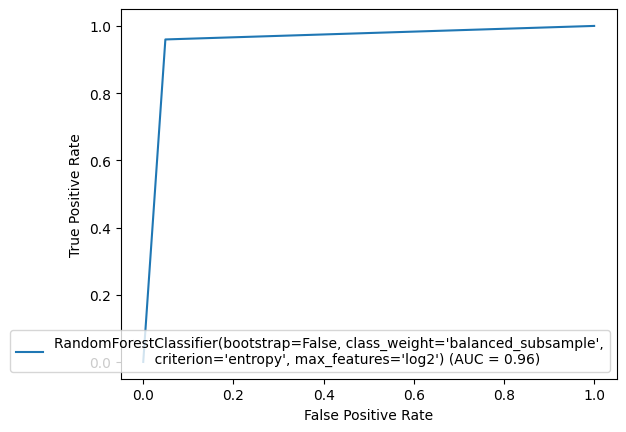

In [54]:
#AUC-ROC curve for decision tree
fpr,tpr,threshold=roc_curve(y_test,y_pred1)
roc_auc=auc(fpr,tpr)
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=rfc1)
display.plot()

In [55]:
#save the best model
import joblib
joblib.dump(rfc1,'RedWineQuality.pkl')

['RedWineQuality.pkl']

In [56]:
#Load the saved model
model=joblib.load('RedWineQuality.pkl')

In [57]:
#Prediction
prediction=model.predict(x_test)
prediction

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,

In [58]:
#testing the predicted output with actual data

a=np.array(y_test)
df=pd.DataFrame()
df["Predicted Output"]=prediction
df["Actual Output"]=a
df

,Predicted Output,Actual Output
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
644,0,0
645,1,1
646,1,1
647,1,1
